In [62]:
import pandas as pd 
from tabulate import tabulate

BENCHMARKS = "../benchmarks/"

species_name: pd.DataFrame = pd.read_csv(f"{BENCHMARKS}species_metrics.csv")
filtered_df_max = species_name.loc[species_name.groupby('Log Name')['F1-Score Avg'].idxmax()].reset_index(drop=True)
filtered_df_min = species_name.loc[species_name.groupby('Log Name')['F1-Score Avg'].idxmin()].reset_index(drop=True)
filtered_df_max = filtered_df_max[["Log Name", "Species", 'F1-Score Avg']]
print("############################################ Max ############################################")
print(tabulate(filtered_df_max[["Log Name", "Species", 'F1-Score Avg']], headers='keys'))
print("############################################ Min ############################################")
print(tabulate(filtered_df_min[["Log Name", "Species", 'F1-Score Avg']], headers='keys'))

############################################ Max ############################################
    Log Name                              Species           F1-Score Avg
--  ------------------------------------  --------------  --------------
 0  Road-Traffic-Fine-Management-Process  5-gram                0.925667
 1  Sepsis Cases                          timed_activity        0.768563
 2  bpi-c-2012                            trace_variant         0.584956
 3  bpi-c-2013                            5-gram                0.971836
 4  bpi-c-2015                            1-gram                0.659589
 5  bpi-c-2017                            1-gram                0.610452
 6  hospital-billing                      trace_variant         0.923681
 7  synthetic, online order               trace_variant         0.975563
############################################ Min ############################################
    Log Name                              Species                       F1-Score A

- **n-Grams** work well for structured logs with repetitive sequences, as they capture local patterns
- **Timed Activity** species are ideal for processes where the timing between events is crucial, such as medical or emergency cases
- **Trace Variants** are effective for capturing high variability in complex logs, as they represent the entire event sequence without abstraction

If no information are known the 1-gram is the best choice. 


In [63]:
import matplotlib.pyplot as plt





Species: 5-gram Log Name: Road-Traffic-Fine-Management-Process
Window Size: Mean: 18.961904761904762, Min: 10, Max: 72


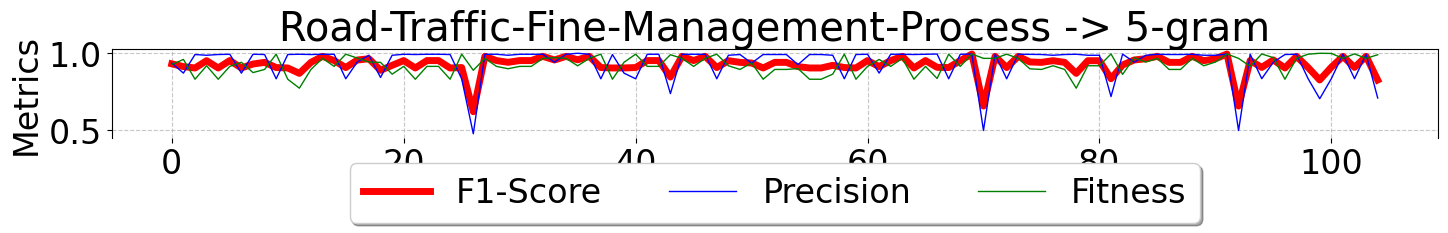

Species: timed_activity Log Name: Sepsis Cases
Window Size: Mean: 14.525547445255475, Min: 4, Max: 118


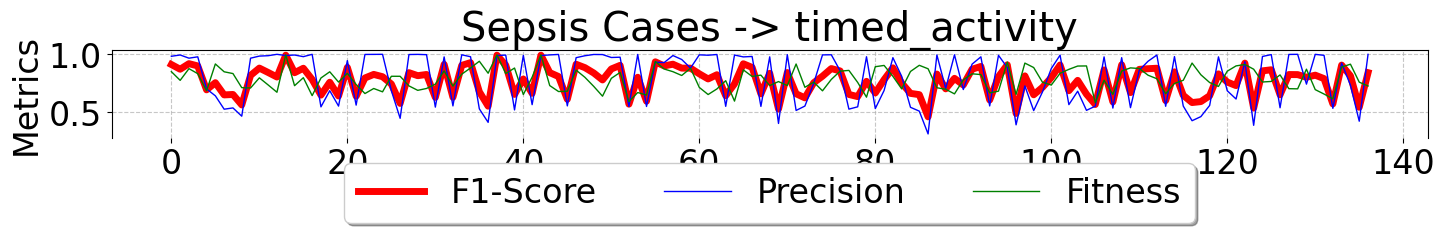

Species: trace_variant Log Name: bpi-c-2012
Window Size: Mean: 133.3846153846154, Min: 6, Max: 559


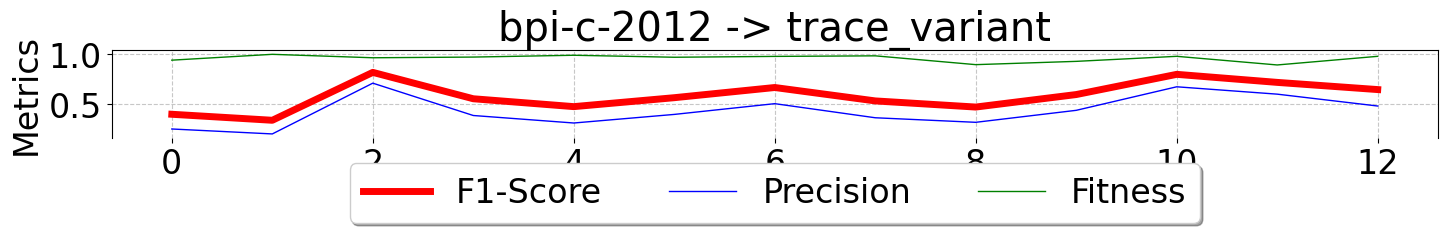

Species: 5-gram Log Name: bpi-c-2013
Window Size: Mean: 69.44444444444444, Min: 25, Max: 187


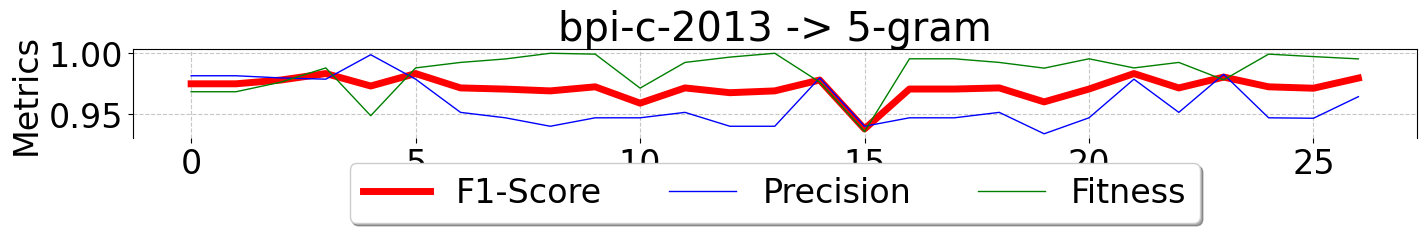

Species: 1-gram Log Name: bpi-c-2015
Window Size: Mean: 49.95, Min: 19, Max: 79


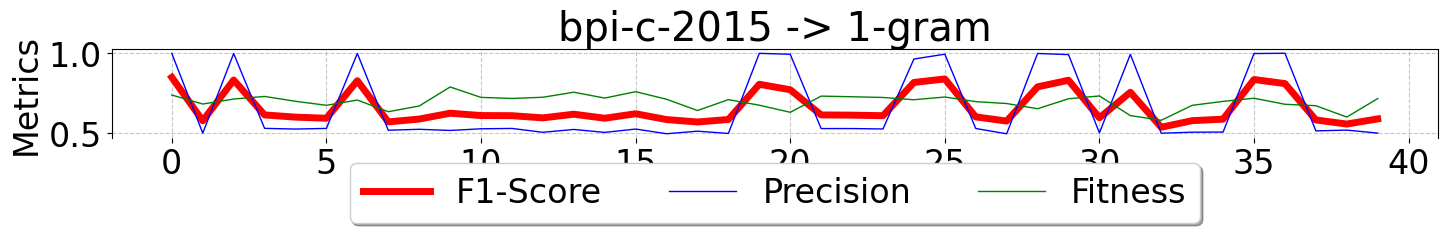

Species: 1-gram Log Name: bpi-c-2017
Window Size: Mean: 37.490566037735846, Min: 18, Max: 84


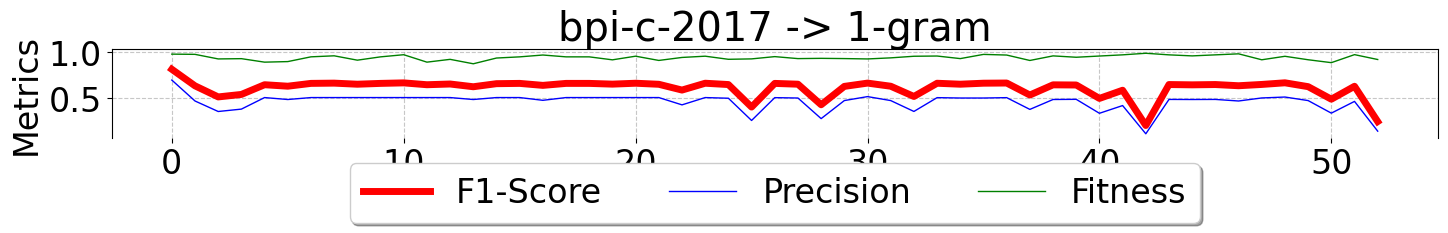

Species: trace_variant Log Name: hospital-billing
Window Size: Mean: 14.184397163120567, Min: 2, Max: 37


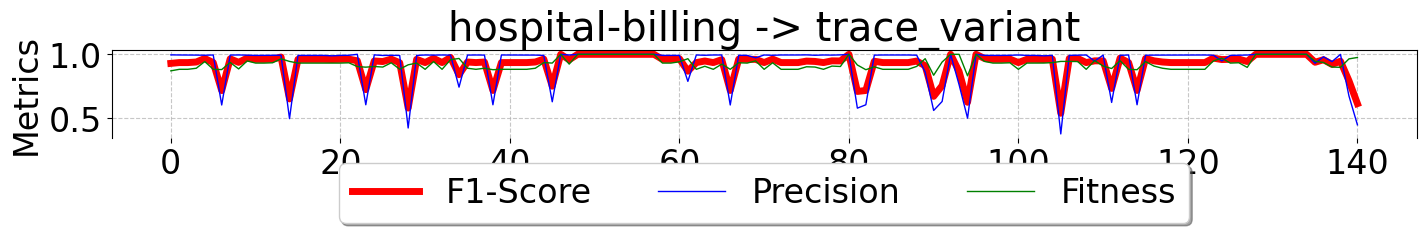

Species: trace_variant Log Name: synthetic, online order
Window Size: Mean: 143.30769230769232, Min: 30, Max: 252


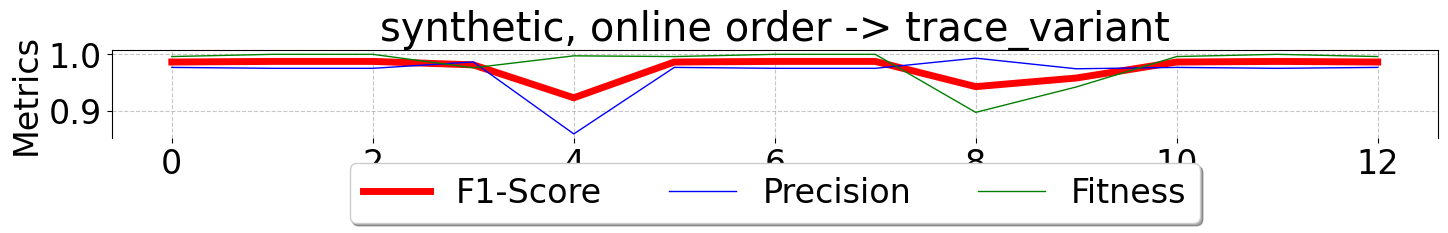

/var/folders/mj/d28mqjj571z5t95qsf56pkr80000gn/T/ipykernel_35256/1359844844.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_fig.show()


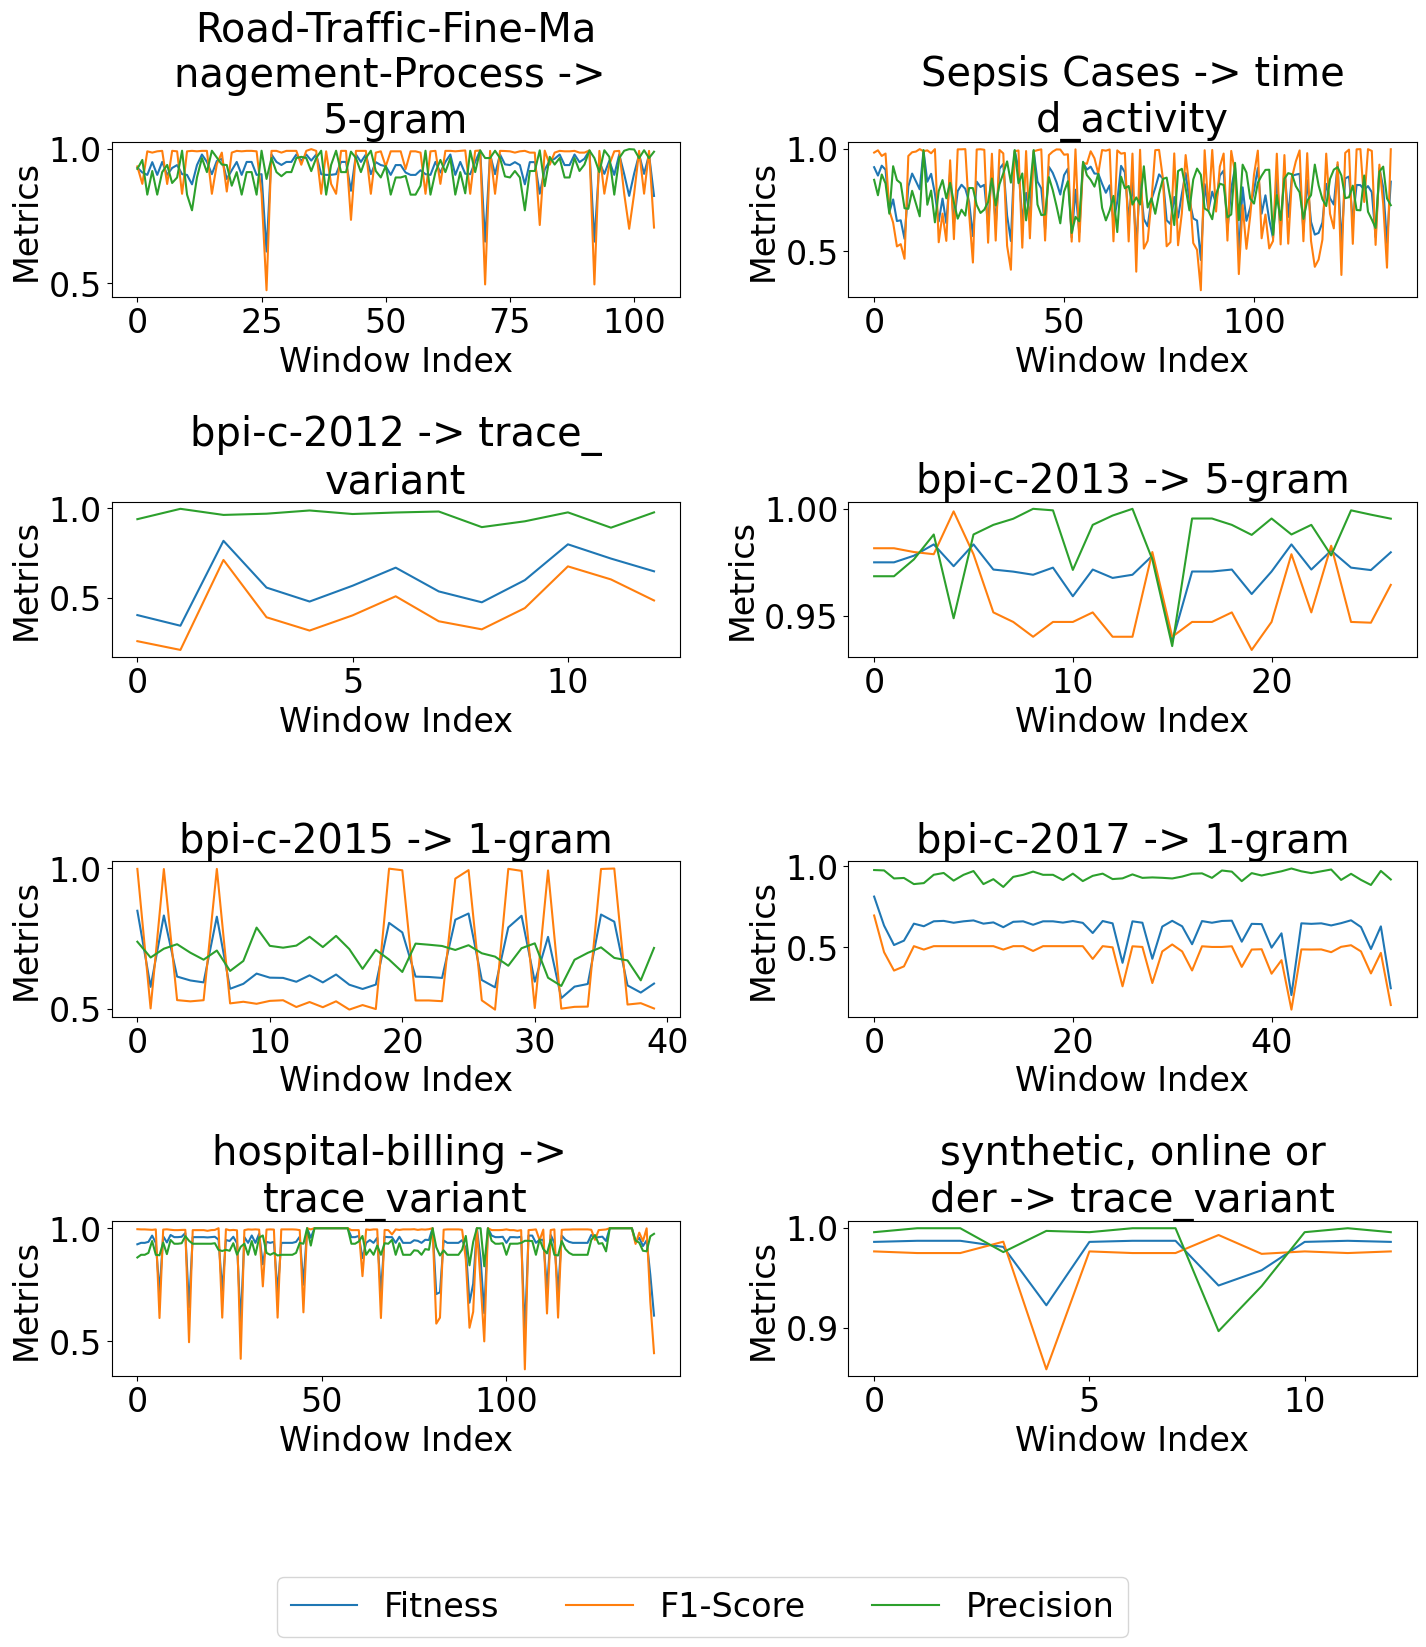

In [64]:
from src.utils.methods import combine_figures
from typing import List
from src.utils.plotter import Plotter


SPECIES_BENCHMARKS = "../benchmarks/species_windows/"
figures: List[plt.Figure] = []
row: pd.Series
for index, row in filtered_df_max.iterrows():
    species_name: str = row["Species"]
    log_name: str = row["Log Name"]
    print(f"Species: {species_name}", f"Log Name: {log_name}")
    window_metrics:pd.DataFrame = pd.read_csv(f"{SPECIES_BENCHMARKS}{log_name}_{species_name}_window_metrics.csv")
    f1_score: List[float] = list(window_metrics["F1-Score"])
    precision: List[float] = list(window_metrics["Precision"])
    fitness: List[float] = list(window_metrics["Fitness"])
    
    window_size: pd.Series = window_metrics["Window Size"]
    ws_mean: float = window_size.mean()
    ws_min: float = window_size.min()
    ws_max: float = window_size.max()
    print(f"Window Size: Mean: {ws_mean}, Min: {ws_min}, Max: {ws_max}")
    
    plotter = Plotter(data_x=list(range(len(f1_score))), title=f"{log_name} -> {species_name}", y_axis_start_at_zero=False)

    plotter.add_subplot(
        [
            (f"F1-Score", f1_score, "red", "5.0"),
            (f"Precision", precision, "blue", "1.0"),
            (f"Fitness", fitness, "green", "1.0"),
        
        ], y_label="Metrics",
        
    )
    fig: plt.Figure = plotter.plot(fig_width=15, fig_height_per_plot=3, x_label="Window Index")
    figures.append(fig)
    
combined_fig = combine_figures(figures)
combined_fig.show()
